In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import json
import os
import scipy.stats as stats

import statsmodels.api as sm
s=json.load(open('nk1877_matplotlibrc.json'))
pl.rcParams.update(s)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"

In [4]:
allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

In [5]:
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [6]:
from pandas.tools.plotting import scatter_matrix

In [7]:
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
print allmales['all'].shape

(49, 49)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x171f6ed50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x174cd0cd0>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x105d5e0d0>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x17a180950>, ...,
       ..., 
        <matplotlib.axes._subplots.AxesSubplot object at 0x1cc6dc3d0>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1cfad1e50>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1d18869d0>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1d38a7fd0>]], dtype=object)

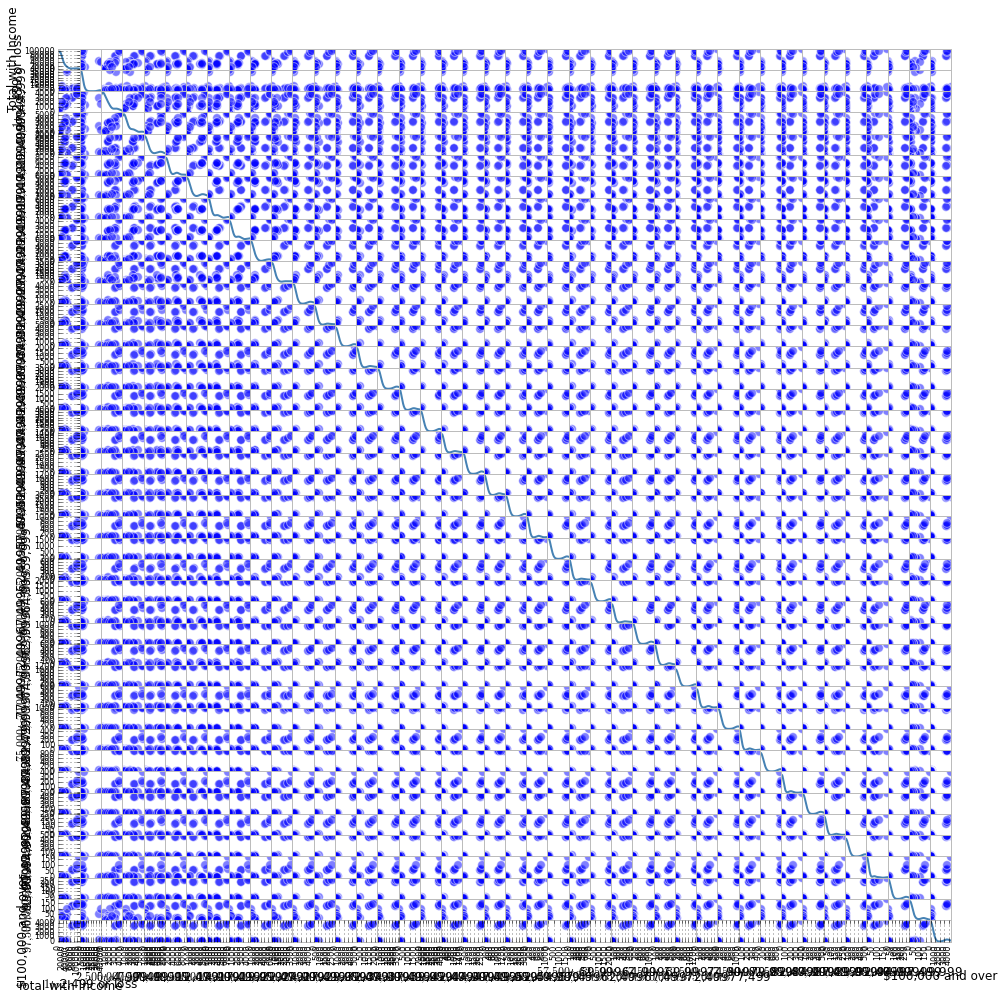

In [17]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (allfemales['all'], s=300, figsize=(16, 16), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x171926950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x200e888d0>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2069b26d0>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2092c2f10>, ...,
       ..., 
        <matplotlib.axes._subplots.AxesSubplot object at 0x276705290>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2786497d0>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x27b68dd10>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x27da6fd10>]], dtype=object)

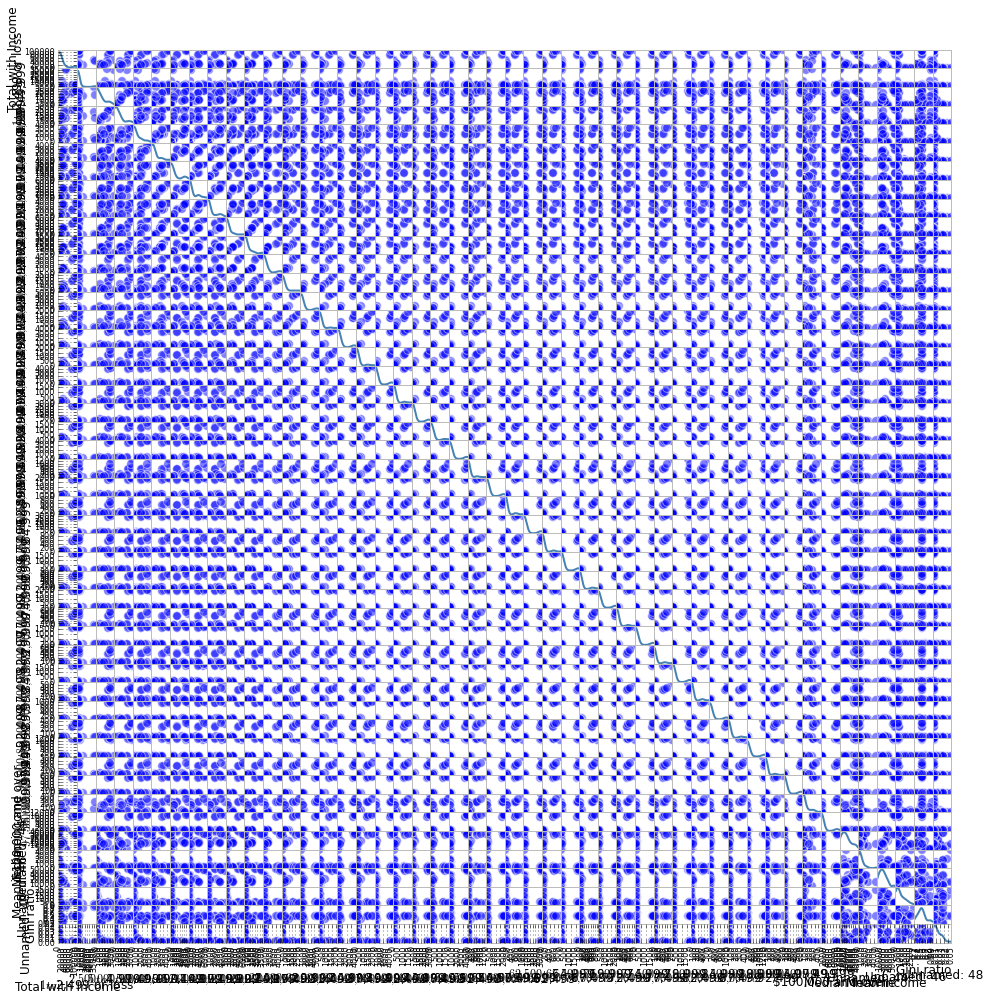

In [18]:
scatter_matrix (allmales['all'], s=300, figsize=(16, 16), diagonal='kde')

In [9]:
k=allmales['white']['Median income']
k.dropna()


1     40122
2     44882
3     45554
4     20445
5      3737
6     16625
7      8381
8      1662
9     10759
10    10599
11    12494
12     4262
13     4915
14     1730
15     1463
16     1943
17     2471
18    17434
19    11920
20    29225
21    22025
22    26812
23    37187
24     8374
25    11884
26    12174
27    17446
28    11798
29    29375
30    22590
31    26868
32    37724
33    13975
35     2579
36     5336
37     4076
38     1772
40    35621
41    39531
42    16698
43    20481
44    16561
45     7988
46    16272
47    14924
Name: Median income, dtype: float64

In [10]:
X=allfemales['white']['Median income'].convert_objects(convert_numeric=True)
Y=allmales['white']['Median income'].convert_objects(convert_numeric=True)


In [11]:
print X.head()
print Y.head()

0      NaN
1    23780
2    30626
3    30919
4    10328
Name: Median income, dtype: float64
0      NaN
1    40122
2    44882
3    45554
4    20445
Name: Median income, dtype: float64


In [12]:
print len(Y)
print len(X)
X=X.dropna()
Y=Y.dropna()
X=X[:45]
print len(Y)

print len(X)
X=list(X)
Y=list(Y)
print len(Y)

print len(X)
print type(X)

49
49
45
45
45
45
<type 'list'>


In [13]:
print X, Y

[23780.0, 30626.0, 30919.0, 10328.0, 1645.0, 12038.0, 7812.0, 2205.0, 12827.0, 8195.0, 9496.0, 4005.0, 3407.0, 1650.0, 1420.0, 1899.0, 2491.0, 10286.0, 6441.0, 17934.0, 10843.0, 17748.0, 13366.0, 4648.0, 10013.0, 6732.0, 10426.0, 5921.0, 23354.0, 14612.0, 18777.0, 13563.0, 3522.0, 8011.0, 4255.0, 4885.0, 4512.0, 1938.0, 21500.0, 23998.0, 12055.0, 13451.0, 11848.0, 6517.0, 11755.0] [40122.0, 44882.0, 45554.0, 20445.0, 3737.0, 16625.0, 8381.0, 1662.0, 10759.0, 10599.0, 12494.0, 4262.0, 4915.0, 1730.0, 1463.0, 1943.0, 2471.0, 17434.0, 11920.0, 29225.0, 22025.0, 26812.0, 37187.0, 8374.0, 11884.0, 12174.0, 17446.0, 11798.0, 29375.0, 22590.0, 26868.0, 37724.0, 13975.0, 2579.0, 5336.0, 4076.0, 1772.0, 35621.0, 39531.0, 16698.0, 20481.0, 16561.0, 7988.0, 16272.0, 14924.0]


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     276.0
Date:                Wed, 14 Oct 2015   Prob (F-statistic):           1.42e-20
Time:                        16:53:03   Log-Likelihood:                -466.94
No. Observations:                  45   AIC:                             935.9
Df Residuals:                      44   BIC:                             937.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.4909      0.090     16.613      0.0

/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


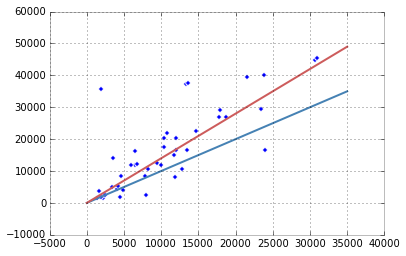

In [14]:
ax1=plt.subplot()

ax1.scatter(X,Y)
x=np.linspace(0,35000,1000)
y=x
model=sm.OLS(Y,X)
results=model.fit()
print results.summary()
fig1=figure(figsize=(10,10))
#m=sm.add_constant(X)
x1=np.linspace(0,35000,1000)
y1=1.4*x
#k=sm.graphics.plot_fit(results, 0, ax=ax1)
ax1.plot(x,y)
ax1.plot(x1,y1)
plt.show()


In [15]:
MaleMedInc = []
MaleMedInc = [allmales['all']['Median income'][1], allmales['white']['Median income'][1], 
     allmales['black']['Median income'][1], allmales['asian']['Median income'][1], allmales['hispanic']['Median income'][1]]
FemaleMedInc = []
FemaleMedInc = [allfemales['all']['Median income'][1], allfemales['white']['Median income'][1], 
    allfemales['black']['Median income'][1], allfemales['asian']['Median income'][1], allfemales['hispanic']['Median income'][1]]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     395.4
Date:                Wed, 14 Oct 2015   Prob (F-statistic):           3.77e-05
Time:                        16:53:08   Log-Likelihood:                -45.545
No. Observations:                   5   AIC:                             93.09
Df Residuals:                       4   BIC:                             92.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6423      0.032     19.885      0.0

/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


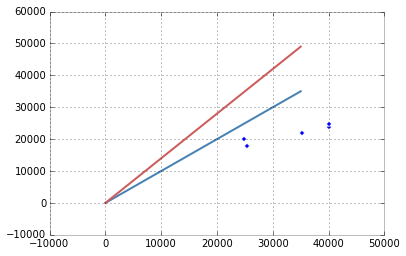

In [16]:
ax1=plt.subplot()

ax1.scatter(MaleMedInc,FemaleMedInc)
x=np.linspace(0,35000,1000)
y=x
model=sm.OLS(FemaleMedInc,MaleMedInc)
results=model.fit()
print results.summary()
fig1=figure(figsize=(10,10))
#m=sm.add_constant(X)
x1=np.linspace(0,35000,1000)
y1=1.4*x
#k=sm.graphics.plot_fit(results, 0, ax=ax1)
ax1.plot(x,y)
ax1.plot(x1,y1)
plt.show()


In [17]:

cor = stats.spearmanr(MaleMedInc,FemaleMedInc)
std(FemaleMedInc)/std(MaleMedInc)
beta1=cor[0]*std(MaleMedInc)/std(FemaleMedInc)
beta0=mean(MaleMedInc)-beta1*mean(FemaleMedInc)

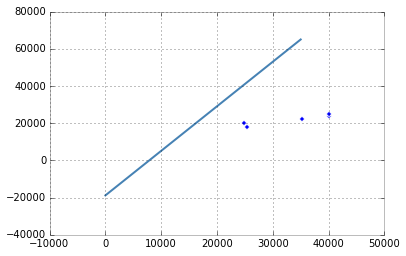

In [18]:
ax1=plt.subplot()

ax1.scatter(MaleMedInc,FemaleMedInc)
x=np.linspace(0,35000,1000)
y=beta1*x +beta0
ax1.plot(x,y)

In [32]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())


In [33]:
allmask = [np.isnan(all_males) + np.isnan(all_females)]

In [21]:
#all_females

In [22]:
#cleanedMales = [x for x in all_males if str(x) != 'nan']
#cleanedFemales = [x for x in all_females if str(x) != 'nan']

In [34]:
#allmask = cleanedMales + cleanedFemales

all_females.mask = allmask
all_males.mask = allmask

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Wed, 14 Oct 2015   Prob (F-statistic):               0.00
Time:                        16:54:54   Log-Likelihood:                    inf
No. Observations:                 245   AIC:                              -inf
Df Residuals:                     244   BIC:                              -inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.0000          0        inf      0.0

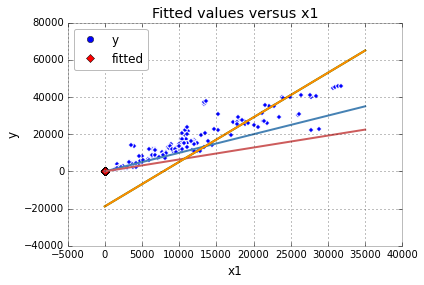

In [36]:
ax1=plt.subplot()

ax1.scatter(all_females,all_males)
a=np.linspace(0,35000,1000)
b=a
model=sm.OLS(all_males.mask,all_females.mask)
results=model.fit()
print results.summary()
fig1=figure(figsize=(10,10))
#m=sm.add_constant(X)
x1=np.linspace(0,35000,1000)
x2=np.linspace(0,35000,1000)
y1=0.6423*x
y2=y=beta1*x +beta0
k=sm.graphics.plot_fit(results, 0, ax=ax1)
ax1.plot(a,b)
ax1.plot(x1,y1)
ax1.plot(x,y)
ax1.plot(x2,y2)
plt.show()
